In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import time
import tracemalloc
import STAGATE_pyG as STAGATE
import anndata as ad
data_dir = '../../dataset/merfish_human_neocortex_SSL.h5ad'
adata = sc.read_h5ad(data_dir)
adata.X = adata.raw.X.copy()
sc.pp.highly_variable_genes(adata, flavor="seurat_v3", n_top_genes=3000)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

slice_ids = adata.obs['slice_id'].unique().tolist()
adata_list = {slice_id: adata[adata.obs['slice_id'] == slice_id] for slice_id in slice_ids}

adata_list

{'ARKFrozen-62-PFC': View of AnnData object with n_obs × n_vars = 51074 × 300
     obs: 'Cell_ID', 'orig.ident', 'nCount_Vizgen', 'nFeature_Vizgen', 'z', 'volume', 'fov', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'Sample_ID', 'Estimated_postconceptional_age_in_days', 'Group', 'Region', 'Region_details', 'integrated_snn_res.2.8', 'class', 'subclass', 'type', 'nCount_niche', 'nFeature_niche', 'niches', 'niche_name', 'type_updated', 'x', 'y', 'cell_type', 'tissue', 'slice_id', 'cellcharter_scVI', 'cellcharter_SSL_BT_ZS', 'cellcharter_SSL_RM_ZS', 'STAGATE_SSL_BT_ZS', 'STAGATE_SSL_RM_ZS', 'STAGATE_original', 'cellcharter_SSL_BT_FT', 'cellcharter_SSL_RM_FT', 'STAGATE_SSL_BT_FT', 'STAGATE_SSL_RM_FT', 'cellcharter_BT_FT_42', 'STAGATE_RM_FT_42', 'STAGATE_BT_FT_42', 'STAGATE_BT_FT_761', 'STAGATE_BT_FT_9824', 'STAGATE_BT_ZS_476', 'STAGATE_BT_ZS_3407', 'STAGATE_RM_FT_761', 'STAGATE_RM_ZS_42', 'STAGATE_RM_ZS_476', 'STAGATE_RM_ZS_761', 'STAGATE_RM_ZS_3407', 'STAGATE_RM_ZS_9824', 'STAGATE_BT_F

------Calculating spatial graph...
The graph contains 7079426 edges, 51074 cells.
138.6112 neighbors per cell on average.


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:107: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = Spatial_Net
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))


------Calculating spatial graph...
The graph contains 3776858 edges, 52483 cells.
71.9635 neighbors per cell on average.


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:107: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = Spatial_Net
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))


------Calculating spatial graph...
The graph contains 2437754 edges, 47632 cells.
51.1789 neighbors per cell on average.


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:107: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = Spatial_Net
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))


------Calculating spatial graph...
The graph contains 9341666 edges, 56343 cells.
165.7999 neighbors per cell on average.


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:107: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = Spatial_Net
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))


------Calculating spatial graph...
The graph contains 1434732 edges, 26593 cells.
53.9515 neighbors per cell on average.


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:107: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['Spatial_Net'] = Spatial_Net
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/STAGATE_pyG-1.0.0-py3.10.egg/STAGATE_pyG/utils.py:194: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plot_df = pd.value_counts(pd.value_counts(adata.uns['Spatial_Net']['Cell1']))


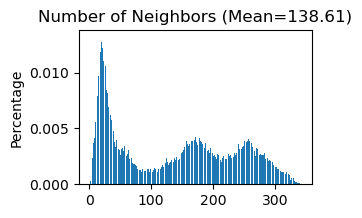

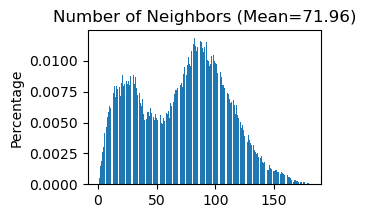

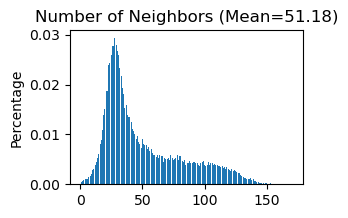

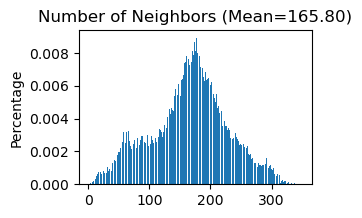

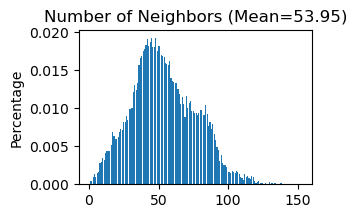

In [2]:
tracemalloc.start()
whole_time_start = time.time()

preprocess_time_start = time.time()
# 对每个切片数据执行 STAGATE 分析

for section_id in adata_list:
    STAGATE.Cal_Spatial_Net(adata_list[section_id], rad_cutoff=150)
    STAGATE.Stats_Spatial_Net(adata_list[section_id])
# 整合所有切片数据
adata = sc.concat([adata_list[section_id] for section_id in adata_list], keys=None)
# 合并所有切片的数据的空间网络
adata.uns['Spatial_Net'] = pd.concat([adata_list[section_id].uns['Spatial_Net'] for section_id in adata_list])

# Normalization
random_seed=42
ssl_adata = ad.AnnData(
    X=adata.obsm[f'SSL_BT_ZS_{random_seed}'],
    obs=adata.obs,
    obsm=adata.obsm,
    uns=adata.uns
)

In [3]:


represetntation_time_start = time.time()
ssl_adata = STAGATE.train_STAGATE(ssl_adata, device='cpu',n_epochs=100)
sc.pp.neighbors(ssl_adata, use_rep='STAGATE')

represetntation_time_cost = time.time() - represetntation_time_start
print(f'time cost for representation: {represetntation_time_cost}')

clustering_time_start = time.time()
ssl_adata = STAGATE.mclust_R(ssl_adata, used_obsm='STAGATE', num_cluster=10)
clustering_time_cost = time.time() - clustering_time_start
print(f'Time cost for clustering: {clustering_time_cost}')

whole_time_cost = time.time() - whole_time_start
# 获取内存使用的峰值
current, peak = tracemalloc.get_traced_memory()
peak_memory_mb = peak / (1024 * 1024)  # 将内存使用量从字节转换为MB
tracemalloc.stop()
print(f'Peak memory usage: {peak_memory_mb:.2f} MB')
print(f'Time cost for whole run : {whole_time_cost}')

Size of Input:  (234125, 64)


100%|██████████| 100/100 [1:25:25<00:00, 51.25s/it]
/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


time cost for representation: 5290.597680568695


R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
Time cost for clustering: 177.6246521472931
Peak memory usage: 14528.85 MB
Time cost for whole run : 5733.282407045364


In [4]:
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from matplotlib import pyplot as plt
import os
# 结果保存目录
output_dir = '../human_neocortex_SSL_BT_ZS_stagate_image'
os.makedirs(output_dir, exist_ok=True)
nmi_values = []
ari_values = []

def compute_nmi(adata, predict_key, ground_truth_key):
    return normalized_mutual_info_score(adata.obs[ground_truth_key], adata.obs[predict_key])

def compute_ari(adata, predict_key, ground_truth_key):
    return adjusted_rand_score(adata.obs[ground_truth_key], adata.obs[predict_key])

for batch in ssl_adata.obs['slice_id'].cat.categories:
    current_adata = ssl_adata[ssl_adata.obs['slice_id'] == batch]
    
    if 'tissue' in current_adata.obs:
        nmi = compute_nmi(adata=current_adata, predict_key='mclust', ground_truth_key='tissue')
        ari = compute_ari(adata=current_adata, predict_key='mclust', ground_truth_key='tissue')
        nmi = np.round(nmi, 3)
        ari = np.round(ari, 3)

        nmi_values.append(nmi)
        ari_values.append(ari)

        title = f'{batch}\n NMI: {nmi}  ARI: {ari}'
        print(title)
    else:
        title = f'{batch}'

    # 绘制以 cluster_cellcharter 标签着色的图像
    axes = sc.pl.embedding(adata=current_adata, basis='spatial', color='mclust', show=False)
    axes.axis('equal')
    axes.set_title(f'{title} (STAGATE_SSL_BT_ZS)')
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'SSL_BT_ZS_embedding_STAGATE_{batch}.png'), dpi=400)
    plt.savefig(os.path.join(output_dir, f'SSL_BT_ZS_embedding_STAGATE_{batch}.eps'), format='eps', dpi=400)
    plt.close()

# 保存到当前目录下名为 results 的文件夹中
# 当前 Notebook 文件名和实验名称
notebook_name = "barlow_twins_zero_shot_stagate_MERSCOPE_human_neocortex_42.ipynb"
experiment_name = "barlow_twins_zero_shot_stagate_MERSCOPE_human_neocortex_42"

if not os.path.exists('results'):
    os.makedirs('results')

# 定义 CSV 文件的路径
csv_filename = f"results/{experiment_name}_results.csv"

# 保存 Batch, NMI, ARI, 和 experiment_name 到 CSV 文件中
import csv
with open(csv_filename, 'a', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    # 如果文件是新建的，写入表头
    if os.stat(csv_filename).st_size == 0:
        writer.writerow(['Experiment Name', 'Batch', 'NMI', 'ARI'])
    writer.writerow([experiment_name, batch, nmi, ari])


ARKFrozen-62-PFC
 NMI: 0.712  ARI: 0.618


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


NIH-4365-BA10
 NMI: 0.369  ARI: 0.181


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


NIH-4392-BA17
 NMI: 0.249  ARI: 0.079


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


NIH-5900-BA17
 NMI: 0.401  ARI: 0.237


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


UCSF2018-003-MFG
 NMI: 0.552  ARI: 0.578


/home/hanchuangyi/miniconda3/envs/stagate_pyG/lib/python3.10/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


In [5]:
new_adata = sc.read_h5ad(data_dir)
new_adata.obs[f'STAGATE_BT_ZS_{random_seed}'] = ssl_adata.obs['mclust']
new_adata.obsm[f'STAGATE_BT_ZS_{random_seed}'] = ssl_adata.obsm['STAGATE']
new_adata

AnnData object with n_obs × n_vars = 234125 × 300
    obs: 'Cell_ID', 'orig.ident', 'nCount_Vizgen', 'nFeature_Vizgen', 'z', 'volume', 'fov', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'Sample_ID', 'Estimated_postconceptional_age_in_days', 'Group', 'Region', 'Region_details', 'integrated_snn_res.2.8', 'class', 'subclass', 'type', 'nCount_niche', 'nFeature_niche', 'niches', 'niche_name', 'type_updated', 'x', 'y', 'cell_type', 'tissue', 'slice_id', 'cellcharter_scVI', 'cellcharter_SSL_BT_ZS', 'cellcharter_SSL_RM_ZS', 'STAGATE_SSL_BT_ZS', 'STAGATE_SSL_RM_ZS', 'STAGATE_original', 'cellcharter_SSL_BT_FT', 'cellcharter_SSL_RM_FT', 'STAGATE_SSL_BT_FT', 'STAGATE_SSL_RM_FT', 'cellcharter_BT_FT_42', 'STAGATE_RM_FT_42', 'STAGATE_BT_FT_42', 'STAGATE_BT_FT_761', 'STAGATE_BT_FT_9824', 'STAGATE_BT_ZS_476', 'STAGATE_BT_ZS_3407', 'STAGATE_RM_FT_761', 'STAGATE_RM_ZS_42', 'STAGATE_RM_ZS_476', 'STAGATE_RM_ZS_761', 'STAGATE_RM_ZS_3407', 'STAGATE_RM_ZS_9824', 'STAGATE_BT_FT_476', 'STAGATE_BT_FT_3407',

In [6]:
new_adata.write_h5ad(data_dir)